In [ ]:
import torch
from torch import nn

In [ ]:
cv=torch.nn.Conv1d(1,1,3)
cv(torch.ones(2,1,13)).shape

torch.Size([2, 1, 11])

In [ ]:
import pandas as pd
import torch
import string
import sys as s
from collections import defaultdict


def p(thing):
    s.stdout.write(thing)


def isnan(x):
    if type(x) == str:
        return False
    try:
        int(x)
        return False
    except:
        return True


class pbar:
    def __init__(self, length, total, frac=False):
        self.length = length
        self.total = total
        if not frac:
            p('|' + '.' * length + '|')
        else:
            pass
        self.count = 0
        self.thresh = total // length
        self.all_count = 0
        self.n = 0

    def frac(self):
        if self.n == self.total - 1:
            p('\n')
            return
        if self.n > 0:
            p('\b' * self.len)
        string = f'{self.n}/{self.total}'
        p(string)
        self.len = len(string)
        self.n += 1


class fbar:
    def __init__(self, length):
        self.length = length - 1
        self.count = 0
        self.slen = 0

    def step(self):
        if self.count == self.length:
            p('\b' * self.slen)
            print(f'{self.count}/{self.length}')
            return
        p('\b' * self.slen)
        s = f'{self.count}/{self.length} '
        self.slen = len(s)
        p(s)
        self.count += 1


newsdf = pd.read_csv('./corona_fake.csv')
titles = newsdf['title']
text = newsdf['text']
labels = newsdf['label']
letters = string.ascii_letters + ' !0123456789?'


def enum1(x):
    for i in range(len(x)):
        yield (i + 1, x[i])


vocab = {letter: i for i, letter in enum1(letters)}
vocab = defaultdict(lambda: 0, vocab)
print(vocab[''],vocab['7'])


def word2tensor(word):
    tens = [vocab[i] for i in word]
    return torch.tensor(tens)


def stack(data):
    result = []
    for i in range(len(data)):
        try:
            result.append(word2tensor(data[i]))
        except:
            result.append(torch.zeros(1))
    return result


tensortext = stack(text)
tensorlabel = []
for label in labels:
    if label == 'Fake' or label == 'fake':
        tensorlabel.append(torch.zeros(1))
    elif label == 'TRUE':
        tensorlabel.append(torch.ones(1))
    else:
        # print(label,'n')
        tensorlabel.append(-1)
tensortitles = stack(titles)


def greatest_len(x):
    great = len(x[0])
    for i in x:
        if len(i) > great:
            great = i
        return great


def pad_to(x, length):
    return torch.nn.functional.pad(x, (0, length - len(x)))


def clean(thing, length):
    new = []
    for sentence in thing:
        new.append(pad_to(sentence, length))
    return new


titlemax = 150
textmax = 400
ptext = clean(tensortext, textmax)
ptitle = clean(tensortitles, titlemax)
len(ptitle), len(ptext), len(tensorlabel)
all_data = []


def batcher(x, y, batch):
    c = batch
    re = []
    for i in range(0, len(x), batch):
        re.append((x[i:c], y[i:c]))
    return re


for j in range(len(ptitle)):
    if tensorlabel[j] < 0:
        # print(tensorlabel[j])
        pass
    elif sum(ptext).sum() == 0 and sum(ptitle).sum() == 0:
        pass
    else:
        all_data.append((ptitle[j], ptext[j], tensorlabel[j]))
test_data = all_data[264:]
val_data = all_data[:264]
print('done')


0 62


In [ ]:
import random
class Better(nn.Module):
    def __init__(self, embed_dim=20, mid=100, out=1):
        super().__init__()
        self.embed = nn.Embedding(len(vocab) + 1, embed_dim)
        self.gru = nn.GRUCell(embed_dim, mid)
        self.fc = nn.Linear(mid, out)
        self.embed_dim = embed_dim

    def forward(self, input):
        words = [torch.mean(self.embed(word2tensor(i).long()), dim=0) for i in input.split(' ')]
        h = torch.zeros(1, 100)
        for i in words:
            if not isnan(i[0]):
                h = self.gru(i.reshape(1, -1), h)
            else:
                h = self.gru(torch.zeros(1, self.embed_dim), h)
        return torch.sigmoid(self.fc(h).reshape(-1))



split=100
val_titles = list(titles)[:split]
val_text=list(text)[:split]
train_titles=list(titles)[split:]
train_labels=tensorlabel[split:]
train_text=list(text)[split:]

def traintitle(data, vals, tlabel, vald=None):
    if vald is None:
        vald=data
    model = Better()
    lof = torch.nn.BCELoss()
    o = torch.optim.Adam(model.parameters(), 0.003)
    for k in range(25):
        b = fbar(len(data))
        for i in range(len(data)):
            b.step()
            if not isnan(data[i]) and int(tlabel[i]) > -1:
                pred = model(data[i])
                loss = lof(pred, tlabel[i])
                model.zero_grad()
                o.zero_grad()
                loss.backward()
                o.step()
        # validation
        model.eval()
        count = 0
        bad = 0
        with torch.no_grad():
            for i in range(vals):
                pick = random.randint(0, len(vald) - 1)
                if not isnan(vald[pick]) and int(tensorlabel[pick]) > -1:
                    pre = model(vald[pick])
                    if torch.round(pre) == tensorlabel[pick]:
                        count += 1
                else:
                    bad += 1
        model.train()
        # print(count,vals-bad)
        valid_points = vals - bad
        print(f'Validation accuracy: {count / valid_points}')
        print(loss, f' epoch: {k}')


traintitle(train_text, 300, train_labels, val_text)


0/1063 1/1063 2/1063 3/1063 4/1063 5/1063 6/1063 7/1063 8/1063 9/1063 10/1063 11/1063 12/1063 13/1063 14/1063 15/1063 16/1063 17/1063 18/1063 19/1063 20/1063 21/1063 22/1063 23/1063 24/1063 25/1063 26/1063 27/1063 28/1063 29/1063 30/1063 31/1063 32/1063 33/1063 34/1063 35/1063 36/1063 37/1063 38/1063 39/1063 40/1063 41/1063 42/1063 43/1063 44/1063 45/1063 46/1063 47/1063 48/1063 49/1063 50/1063 51/1063 52/1063 53/1063 54/1063 55/1063 56/1063 57/1063 58/1063 59/1063 60/1063 61/1063 62/1063 63/1063 

In [ ]:
len(list(train_text))

1064

In [ ]:
count=0
for i in val_text:
  if i in train_text and not isnan(i):
    count+=1
    print(i)
count/len(val_titles)

Most of the people who catch COVID-19 can recover and eliminate the virus from their bodies. If you catch the disease, make sure you treat your symptoms. If you have cough, fever, and difficulty breathing, seek medical care early – but call your health facility by telephone first. Most patients recover thanks to supportive care.
The most common symptoms of COVID-19 are dry cough, tiredness and fever. Some people may develop more severe forms of the disease, such as pneumonia. The best way to confirm if you have  the virus producing COVID-19 disease is with a laboratory test.  You cannot confirm it with this breathing exercise, which can even be dangerous.
There is no reason to believe that cold weather can kill the new coronavirus or other diseases. The normal human body temperature remains around 36.5°C to 37°C, regardless of the external temperature or weather. The most effective way to protect yourself against the new coronavirus is by frequently cleaning your hands with alcohol-bas

0.07

In [ ]:
len(val_titles),len(train_titles)

(100, 1064)

In [ ]:
def isnan(x):
    if type(x) == str:
        return False
    try:
        int(x)
        return False
    except:
        return True

In [ ]:
import torch
from torch import nn

In [ ]:
c=nn.Conv1d(6,3,3)
i=torch.randn(2,6,3)
c(i).shape

torch.Size([2, 3, 1])

In [ ]:
1@2

TypeError: ignored

In [ ]:
a=torch.randn(5,3)
print(a)
soft=torch.nn.functional.softmax(a,dim=0)
print(soft[:,0].sum())

tensor([[ 0.3482,  1.0470,  0.9487],
        [-0.8858, -2.4407,  0.1233],
        [ 0.1575,  1.5449,  0.7468],
        [ 0.6827,  0.8615,  0.3122],
        [-0.7882,  1.9227,  0.7853]])
tensor(1.)


In [ ]:
import tweepy

In [ ]:
tweepy.get_status(4255512532)

AttributeError: ignored

In [ ]:
a=torch.ones(3,4,5,2)
def list2tensor(l):
  out=torch.empty(len(l),*l[0].shape)
  return torch.cat(l,out=out)
li=[torch.randn(2,3) for i in range(5)]
print(li)
list2tensor(li)

[tensor([[ 0.2398,  1.9134, -0.1323],
        [ 0.4135, -1.3769, -0.5103]]), tensor([[ 0.1116, -1.1974,  0.4395],
        [-0.6353,  0.9606, -2.2696]]), tensor([[-0.4725,  1.3173,  0.5328],
        [ 0.4476, -0.1453,  0.4849]]), tensor([[ 0.4738, -1.3387,  0.9852],
        [ 0.9471,  0.9510, -0.6839]]), tensor([[-1.4306,  1.8162, -2.2721],
        [-2.2830,  0.4911, -0.5858]])]


tensor([[ 0.2398,  1.9134, -0.1323],
        [ 0.4135, -1.3769, -0.5103],
        [ 0.1116, -1.1974,  0.4395],
        [-0.6353,  0.9606, -2.2696],
        [-0.4725,  1.3173,  0.5328],
        [ 0.4476, -0.1453,  0.4849],
        [ 0.4738, -1.3387,  0.9852],
        [ 0.9471,  0.9510, -0.6839],
        [-1.4306,  1.8162, -2.2721],
        [-2.2830,  0.4911, -0.5858]])

In [ ]:
import torch

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mp
import numpy as np

In [ ]:
pts=np.array([[0,1],[1,0],[1,1]])
def ssplit(t):
    a=[]
    b=[]
    for i in t:
      a.append(i[0])
      b.append(i[1])
    return (a,b)
def polygon(pts):
  polygon=mp.Polygon(pts)
  fig, ax = plt.subplots()
  plt.axis([0,5,0,5])
  plt.scatter(*ssplit(pts))
  ax.add_patch(polygon)
  plt.show()

In [ ]:
class plot:
  def __init__(self,points,axis):
    self.points=points
    polygon=mp.Polygon(points)
    fig, ax = plt.subplots()
    plt.axis(axis)
    plt.scatter(*ssplit(points))
    ax.add_patch(polygon)
    plt.show(block)
  def translate(self,rules):
    for i in 

RuntimeError: ignored

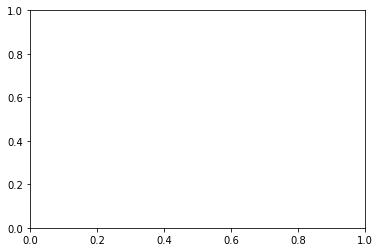

In [ ]:
plt.gca().add_image(polygon)

RuntimeError: ignored

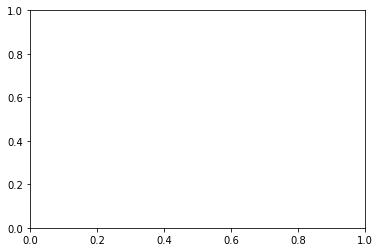

In [ ]:
g=plt.gca()
g.add_patch(polygon)

In [ ]:
print(plt.gca.__doc__)


    Get the current :class:`~matplotlib.axes.Axes` instance on the
    current figure matching the given keyword args, or create one.

    Examples
    --------
    To get the current polar axes on the current figure::

        plt.gca(projection='polar')

    If the current axes doesn't exist, or isn't a polar one, the appropriate
    axes will be created and then returned.

    See Also
    --------
    matplotlib.figure.Figure.gca : The figure's gca method.
    


In [ ]:
plt.gca(polygon)

TypeError: ignored

In [ ]:
a=[torch.ones(1,9) for i in range(10)]
d=torch.tensor([])
for i in range(len(a)):
  d=torch.cat((d,a[i]),dim=-1)
d.shape

torch.Size([1, 90])

In [ ]:
import pandas as pd
import torch
import string
import sys as s
from collections import defaultdict


def p(thing):
    s.stdout.write(thing)


def isnan(x):
    if type(x) == str:
        return False
    try:
        int(x)
        return False
    except:
        return True


class pbar:
    def __init__(self, length, total, frac=False):
        self.length = length
        self.total = total
        if not frac:
            p('|' + '.' * length + '|')
        else:
            pass
        self.count = 0
        self.thresh = total // length
        self.all_count = 0
        self.n = 0

    def frac(self):
        if self.n == self.total - 1:
            p('\n')
            return
        if self.n > 0:
            p('\b' * self.len)
        string = f'{self.n}/{self.total}'
        p(string)
        self.len = len(string)
        self.n += 1


class fbar:
    def __init__(self, length):
        self.length = length - 1
        self.count = 0
        self.slen = 0

    def step(self):
        if self.count == self.length:
            p('\b' * self.slen)
            print(f'{self.count}/{self.length}')
            return
        p('\b' * self.slen)
        s = f'{self.count}/{self.length} '
        self.slen = len(s)
        p(s)
        self.count += 1


newsdf = pd.read_csv('./corona_fake.csv')
titles = newsdf['title']
text = newsdf['text']
labels = newsdf['label']
letters = string.ascii_letters + ' !0123456789?'


def enum1(x):
    for i in range(len(x)):
        yield (i + 1, x[i])


vocab = {letter: i for i, letter in enum1(letters)}
vocab = defaultdict(lambda: 0, vocab)
#print(vocab[''],vocab['7'])


def word2tensor(word):
    tens = [vocab[i] for i in word]
    return torch.tensor(tens)


def stack(data):
    result = []
    for i in range(len(data)):
        try:
            result.append(word2tensor(data[i]))
        except:
            result.append(torch.zeros(1))
    return result


tensortext = stack(text)
tensorlabel = []
for label in labels:
    if label == 'Fake' or label == 'fake':
        tensorlabel.append(torch.zeros(1))
    elif label == 'TRUE':
        tensorlabel.append(torch.ones(1))
    else:
        # print(label,'n')
        tensorlabel.append(-1)
tensortitles = stack(titles)


def greatest_len(x):
    great = len(x[0])
    for i in x:
        if len(i) > great:
            great = i
        return great


def pad_to(x, length):
    return torch.nn.functional.pad(x, (0, length - len(x)))


def clean(thing, length):
    new = []
    for sentence in thing:
        new.append(pad_to(sentence, length))
    return new


titlemax = 150
textmax = 400
ptext = clean(tensortext, textmax)
ptitle = clean(tensortitles, titlemax)
len(ptitle), len(ptext), len(tensorlabel)
all_data = []


def batcher(x, y, batch):
    c = batch
    re = []
    for i in range(0, len(x), batch):
        re.append((x[i:c], y[i:c]))
    return re


for j in range(len(ptitle)):
    if tensorlabel[j] < 0:
        # print(tensorlabel[j])
        pass
    elif sum(ptext).sum() == 0 and sum(ptitle).sum() == 0:
        pass
    else:
        all_data.append((ptitle[j], ptext[j], tensorlabel[j]))
test_data = all_data[264:]
val_data = all_data[:264]

def list2tensor(l):
  out=torch.empty(len(l),*l[0].shape)
  return torch.cat(l,out=out)
# print('done')

In [ ]:
train_text=list(text)[100:]
val_text=list(text)[:100]
train_labels=tensorlabel[100:]
val_labels=tensorlabel[:100]
import torch
from torch import nn
class Betteratten(nn.Module):
    def __init__(self, embed_dim=20, mid=100, out=1):
        super().__init__()
        self.embed = nn.Embedding(len(vocab) + 1, embed_dim)
        self.gru = nn.GRUCell(embed_dim, mid)
        self.fc = nn.Linear(mid, out)
        self.embed_dim = embed_dim
        self.hfc = nn.Linear(2 * mid, mid)
        self.decoder = nn.GRU(mid, mid)

    def forward(self, input):
        words = [torch.mean(self.embed(word2tensor(i).long()), dim=0) for i in input.split(' ')]
        scores = []
        h = torch.zeros(1, 100)
        for i in words:
            if not isnan(i[0]):
                h = self.gru(i.reshape(1, -1), h)
            else:
                h = self.gru(torch.zeros(1, self.embed_dim), h)
            scores.append(h)
        w = torch.tensor([])
        for score in range(len(scores)) :
            w=self.hfc(torch.cat((scores[score], scores[-1]),dim=1))
        atten_w = nn.functional.softmax(w, dim=-1)
        context = atten_w.sum(dim=0)
        #print(len(scores),'\n')
        return torch.sigmoid(self.fc(context).reshape(-1))


def train_attten(data, vals, tlabel, vald=None):
    if vald is None:
        vald = data
    model = Betteratten()
    lof = torch.nn.BCELoss()
    o = torch.optim.Adam(model.parameters(), 0.003)
    for k in range(25):
        b = fbar(len(data))
        for i in range(len(data)):
            b.step()
            if not isnan(data[i]) and int(tlabel[i]) > -1:
                pred = model(data[i])
                loss = lof(pred, tlabel[i])
                model.zero_grad()
                o.zero_grad()
                loss.backward()
                o.step()
        # validation
        model.eval()
        count = 0
        bad = 0
        with torch.no_grad():
            for i in range(vals):
                pick = random.randint(0, len(vald) - 1)
                if not isnan(vald[pick]) and int(tensorlabel[pick]) > -1:
                    pre = model(vald[pick])
                    print(vald[pick], torch.round(pre), int(tensorlabel[pick]))
                    if torch.round(pre) == tensorlabel[pick]:
                        count += 1
                else:
                    bad += 1
        model.train()
        valid_points = vals - bad
        print(f'Validation accuracy: {count / valid_points}')
        print(loss, f' epoch: {k}')


train_attten(train_text, len(val_text), train_labels, val_text)

In [ ]:
import random